# Smooth and vectorize into SVG

In [13]:
from PIL import Image, ImageFilter
import cv2
import numpy as np
from skimage import io
import subprocess
import os
from IPython.display import SVG, display

def smooth_and_vectorize_svg(image_path, smoothing, color, opacity):
    '''
    Takes a png, smooths the edges, turns it into a vector (.svg), colours the forest vector, and changes the opacity.
    Saves a smoothed image png, and a final output.svg
    
    smoothing = level of median smoothing [odd integers: 1, 3, 5, 7 etc], 
    color = string in hexcode #FF0000 
    opacity = float from 0 - 1
    '''
    # Load the image and apply median smoothing
    image = Image.open(image_path)
    med_img = image.filter(ImageFilter.MedianFilter(size=smoothing))
    
    # Save the smoothed image
    med_img.save('smoothed_image.png')
    
    # Convert the smoothed image to grayscale
    smoothed_image = cv2.imread('smoothed_image.png', cv2.IMREAD_GRAYSCALE)
    
    # Binarize the smoothed image
    _, binary_image = cv2.threshold(smoothed_image, 127, 255, cv2.THRESH_BINARY)
    
    # Save the binary image to a temporary file
    temp_binary_image_path = 'temp_binary_image.pbm'
    io.imsave(temp_binary_image_path, binary_image.astype(np.uint8))
    
    # Output SVG file path
    output_svg_path = 'svg_color.svg'
    
    # Run Potrace to convert PBM to SVG
    subprocess.run(['potrace', temp_binary_image_path, '-s', '-o', output_svg_path], check=True)
    
    # Clean up temporary files
    os.remove(temp_binary_image_path)
    os.remove('smoothed_image.png')  # Remove the smoothed image
    
    # Change the SVG color and opacity
    with open(output_svg_path, 'r') as file:
        svg_content = file.read()
    
    new_fill = f'fill="{color}" fill-opacity="{opacity}"'
    svg_content = svg_content.replace('fill="black"', new_fill)
    svg_content = svg_content.replace('fill="#000000"', new_fill)
    
    with open(output_svg_path, 'w') as file:
        file.write(svg_content)
    
    # Display the SVG in the notebook
    display(SVG(output_svg_path))


# Smooth and vectorize into PNG with transparent background

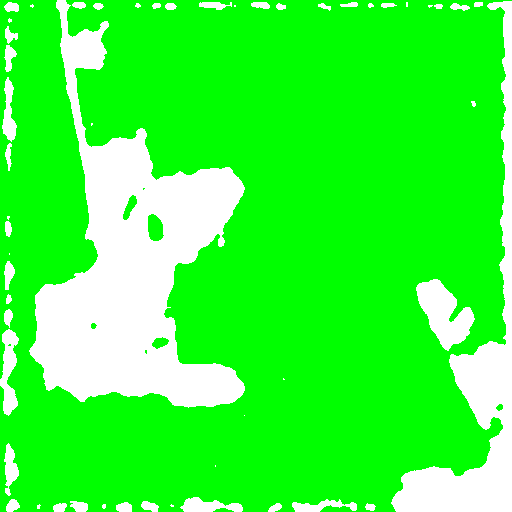

In [46]:
from PIL import Image, ImageFilter
import cv2
import numpy as np
#from IPython.display import display

def smooth_and_vectorize_png(image_path, smoothing, color):
    '''
    Takes a png, smooths the edges, turns it into a png with a transparent background and colors the forest area.
    
    smoothing = level of median smoothing [odd integers: 1, 3, 5, 7 etc], 
    color = string in hexcode #FF0000 
    '''
    # Load the image and apply median smoothing
    image = Image.open(image_path).convert("RGBA")
    med_img = image.filter(ImageFilter.MedianFilter(size=smoothing))
    
    # Convert the smoothed image to grayscale
    smoothed_image = cv2.cvtColor(np.array(med_img), cv2.COLOR_RGBA2GRAY)
    
    # Binarize the smoothed image (invert the binary image)
    _, binary_image = cv2.threshold(smoothed_image, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Create a mask from the binary image
    mask = Image.fromarray(binary_image).convert("L")
    
    # Create an RGBA image with the specified color
    color_img = Image.new("RGBA", image.size, color)
    
    # Composite the color image with the mask
    smooth_coloured_vector = Image.composite(color_img, Image.new("RGBA", image.size, (0, 0, 0, 0)), mask)
    
    # # Save the final image
    # final_output_path = 'smoothed_png.png'
    # final_img.save(final_output_path)
    
    # Display the final image
    # display(final_img)

# Example usage:


In [41]:
test = Image.open('/Users/viktor/code/vikfalk/deforestation/deforestation_frontend/image_postproc/model_output.png').convert("RGBA")

In [43]:
np.array(test)

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[  0

In [39]:
from PIL import Image

# Load your TIFF image
tiff_image = Image.open('model_input.tiff')

# Load the converted PNG image
svg_image = Image.open('smoothed_png.png')

# Overlay the SVG (PNG) onto the TIFF
tiff_image.paste(svg_image, (0, 0), svg_image)  # (0, 0) is the top-left corner

tiff_image.save('final_overlay_image.png')

# Or display the image
tiff_image.show()


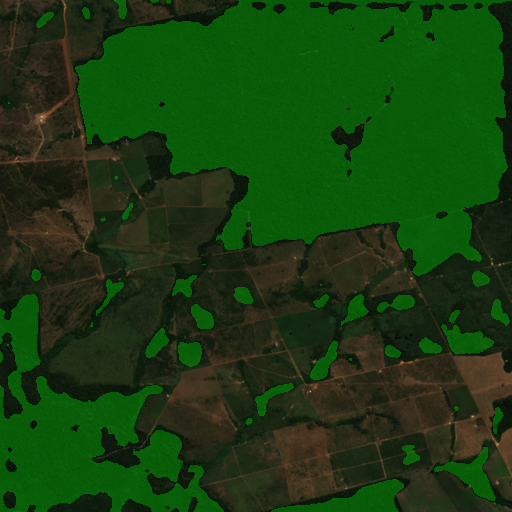

In [40]:
tiff_image